<h1 style="text-align:center;">OBJETIVO DEL MODELO</h1>

<br>

<center>
Este modelo trata de predecir si el cliente pagará o no el credito que solicita
</center>

## Importamos el archivo

In [32]:
# Importamos el archivo CSV con el que vamos a trabajar
import pandas as pd

df = pd.read_csv('CreditScoring.csv')

# Comprobamos las dimensiones del dataframe
print('El tamaño de la tabla es:',df.shape)

# Imprimimos las primeras filas para ver el dataframe
df.head()

El tamaño de la tabla es: (4455, 14)


,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


<br>
<br>

## Prepocesamiento

In [33]:
# Modificamos el nombre de las columnas para que todos estén en minúsculas
df.columns = df.columns.str.lower()
df.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

In [34]:
# Comprobamos varias estadisticas de las columnas del dataframe
df.describe().round()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,1.0,8.0,3.0,46.0,37.0,2.0,1.0,2.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,0.0,8.0,2.0,15.0,11.0,1.0,0.0,1.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,0.0,0.0,6.0,18.0,0.0,1.0,0.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,1.0,2.0,2.0,36.0,28.0,2.0,1.0,1.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,1.0,5.0,2.0,48.0,36.0,2.0,1.0,1.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,2.0,12.0,4.0,60.0,45.0,2.0,1.0,3.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,2.0,48.0,6.0,72.0,68.0,5.0,2.0,4.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


**Como podemos ver los valores máximos de "income", "assets" y "debt" son valores erroneos, los cuales vamos a eliminar**

**En esta ocasión lo sustituiremos por un valor nulo, más tarde decidiremos como tratarlos**

In [35]:
# Reemplazamos los valores erroneos por nulos
import numpy as np

for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

<br>
<br>

**Verificamos si el valor 0 de la columna "status" es un valor erróneo**

In [36]:
# Observamos los valores de la columna "status" para corroborar que el valor "0" es un error
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

<br>
<br>

**Corroboramos que el valor 0 es un error, procedemos a eliminar esa fila**

In [37]:
# Filtramos para eliminar esa fila de nuestro dataframe
df = df[df.status != 0]

<br>
<br>

**Mapeamos las filas con solo 2 valores**

In [38]:
# Definimos nuevos valores para "status" y "records" para facilitar su compresión
bool_mapping = {1: 0, 2: 1}

# Aplicamos el mapeo utilizando map
df.status = df.status.map(bool_mapping)
df.records = df.records.map(bool_mapping)

<br>
<br>

**Convertimos algunas columnas en categoricas**

In [39]:
# Categorizamos las siguientes columnas
df.home =  df.home.astype('category')
df.marital = df.marital.astype('category')
df.job = df.job.astype('category')


<br>
<br>

**Verificamos la cantidad de nulos que tenemos para decidir como tratarlos**

In [40]:
# Analizamos el porcentaje de nulos en cada columna
(df.isnull().mean() * 100).round(2)

status       0.00
seniority    0.00
home         0.00
time         0.00
age          0.00
marital      0.00
records      0.00
job          0.00
expenses     0.00
income       0.76
assets       1.06
debt         0.40
amount       0.00
price        0.00
dtype: float64

**Ya que los porcentajes de nulos son muy bajos decidimos eliminar cualquier fila que contenga un nulo**

In [41]:
# Eliminamos cualquier fila que tenga un nulo en cualquiera de las columnas
df = df.dropna()

In [42]:
# Comprobamos un ejemplo aleatorio del dataframe así como el tamaño definitivo que tiene
print(df.shape)
df.sample(5)

(4377, 14)


,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3291,0,2,5,36,28,1,1,1,35,51.0,0.0,0.0,325,525
1100,0,12,1,36,35,2,1,3,82,74.0,8000.0,0.0,475,550
432,0,3,1,48,60,3,0,3,54,186.0,0.0,0.0,850,1036
1171,1,7,2,48,29,2,0,1,60,62.0,4000.0,0.0,984,984
1562,0,0,2,36,62,2,0,4,45,73.0,5000.0,0.0,430,1132


<br>
<br>

## Preparación del dataset

In [43]:
# Dividimos el dataframe entre entrenamiento y validacion
from sklearn.model_selection import train_test_split

x = df.drop(columns=['status'])
y = df.status

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=99)

<br>
<br>

#### Función cálculo overfittiing y underfitting

Mediremos el overfitting y el underfitting en función a la métrica AUC

In [44]:
def evaluar_fit(auc_train, auc_test):
    
    dif = auc_train - auc_test
    under = abs(dif) if dif < 0 else 0
    over = dif if dif > 0 else 0
        
    return under, over

## Modelos

Vamos a hacer una primera iteración de los principales modelos para ver que resultado obtenemos

#### RandomForest

In [45]:
# Buscamos los hiperparamentros para el modelo RandomForest
from flaml import AutoML

automl_forest = AutoML()
settings = {
    'task': 'classification',
    'estimator_list': ['rf'],
    'time_budget': 600,
    'metric': 'roc_auc',
    'verbose': 1
}

automl_forest.fit(x_train, y_train, **settings)

In [46]:
# Predecimos con el modelo con hiperparametros
y_pred_train_rf = automl_forest.predict(x_train)
probs_train_rf = automl_forest.predict_proba(x_train)[:, 1]

y_pred_test_rf = automl_forest.predict(x_test)
probs_test_rf = automl_forest.predict_proba(x_test)[:, 1]

In [47]:
# Verificamos la eficiencia de nuestro modelo
import sklearn
from sklearn.metrics import roc_auc_score, accuracy_score

train_auc = roc_auc_score(y_train, probs_train_rf)
train_accuracy = accuracy_score(y_train, y_pred_train_rf)

test_auc = roc_auc_score(y_test, probs_test_rf)
test_accuracy = accuracy_score(y_test, y_pred_test_rf)

# Ejecutamos la función que nos indica la relacion de resultados entre train y test
under, over = evaluar_fit(train_auc, test_auc)

# Creamos un DataFrame para almacenar los resultados de los tests
df_resultados = pd.DataFrame({
    "Test AUC": [test_auc],
    "Test Accuracy": [test_accuracy],
    "Underfitting": [under],
    "Overfitting": [over]
}, index=["RandomForest"])


# Mostramos la tabla con los resultados del test
df_resultados

,Test AUC,Test Accuracy,Underfitting,Overfitting
RandomForest,0.849367,0.804795,0,0.096049


<br>
<br>

#### XGBoost

In [48]:
automl_xgb = AutoML()
settings = {
    'task': 'classification',
    'estimator_list': ['xgboost'],
    'time_budget': 600,
    'metric': 'roc_auc',
    'verbose': 1
}

automl_xgb.fit(x_train, y_train, **settings)

In [49]:
# Predecimos con el modelo con hiperparametros
y_pred_train_xgb = automl_xgb.predict(x_train)
probs_train_xgb = automl_xgb.predict_proba(x_train)[:, 1]

y_pred_test_xgb = automl_xgb.predict(x_test)
probs_test_xgb = automl_xgb.predict_proba(x_test)[:, 1]

In [50]:
# Comprobamos los resultados del modelo con hiperparametros
train_auc = roc_auc_score(y_train, probs_train_xgb)
train_accuracy = accuracy_score(y_train, y_pred_train_xgb)

test_auc = roc_auc_score(y_test, probs_test_xgb)
test_accuracy = accuracy_score(y_test, y_pred_test_xgb)

# Ejecutamos la función que nos indica la relacion de resultados entre train y test
under, over = evaluar_fit(train_auc, test_auc)

# Agregamos los resultados al df de resultados
df_resultados.loc["XGBoost"] = [test_auc, test_accuracy, under, over]
df_resultados.sort_values(by='Test AUC', ascending=False)

,Test AUC,Test Accuracy,Underfitting,Overfitting
RandomForest,0.849367,0.804795,0.0,0.096049
XGBoost,0.846096,0.813927,0.0,0.044899


<br>
<br>

#### Catboost

In [51]:
# Buscamos los mejores hiperparametros para CatBoost
automl_cat = AutoML()
settings = {
    'task': 'classification',
    'estimator_list': ['catboost'],
    'time_budget': 600,
    'metric': 'roc_auc',
    'verbose': 1
}

automl_cat.fit(x_train, y_train, **settings)

In [52]:
# Predecimos con el modelo con hiperparametros
y_pred_train_cat = automl_cat.predict(x_train)
probs_train_cat = automl_cat.predict_proba(x_train)[:, 1]

y_pred_test_cat = automl_cat.predict(x_test)
probs_test_cat = automl_cat.predict_proba(x_test)[:, 1]

In [53]:
# Comprobamos los resultados del modelo con hiperparametros
train_auc = roc_auc_score(y_train, probs_train_cat)
train_accuracy = accuracy_score(y_train, y_pred_train_cat)

test_auc = roc_auc_score(y_test, probs_test_cat)
test_accuracy = accuracy_score(y_test, y_pred_test_cat)

# Ejecutamos la función que nos indica la relacion de resultados entre train y test
under, over = evaluar_fit(train_auc, test_auc)

# Agregamos los resultados al df de resultados
df_resultados.loc["CatBoost"] = [test_auc, test_accuracy, under, over]
df_resultados.sort_values(by='Test AUC', ascending=False)

,Test AUC,Test Accuracy,Underfitting,Overfitting
CatBoost,0.851683,0.804795,0.0,0.029549
RandomForest,0.849367,0.804795,0.0,0.096049
XGBoost,0.846096,0.813927,0.0,0.044899


<br>
<br>

#### LightGBM

In [54]:
# Buscamos los mejores hiperparametros para LightGBM
automl_lgbm = AutoML()
settings = {
    'task': 'classification',
    'estimator_list': ['lgbm'],
    'time_budget': 600,
    'metric': 'roc_auc',
    'verbose': 1
}

automl_lgbm.fit(x_train, y_train, **settings)

In [55]:
# Predecimos con el modelo con hiperparametros
y_pred_train_lgbm = automl_lgbm.predict(x_train)
probs_train_lgbm = automl_lgbm.predict_proba(x_train)[:, 1]

y_pred_test_lgbm = automl_lgbm.predict(x_test)
probs_test_lgbm = automl_lgbm.predict_proba(x_test)[:, 1]

In [56]:
# Comprobamos los resultados del modelo con hiperparametros
train_auc = roc_auc_score(y_train, probs_train_lgbm)
train_accuracy = accuracy_score(y_train, y_pred_train_lgbm)

test_auc = roc_auc_score(y_test, probs_test_lgbm)
test_accuracy = accuracy_score(y_test, y_pred_test_lgbm)

# Ejecutamos la función que nos indica la relacion de resultados entre train y test
under, over = evaluar_fit(train_auc, test_auc)

# Agregamos los resultados al df de resultados
df_resultados.loc["LightGBM"] = [test_auc, test_accuracy, under, over]
df_resultados.sort_values(by='Test AUC', ascending=False)

,Test AUC,Test Accuracy,Underfitting,Overfitting
CatBoost,0.851683,0.804795,0.0,0.029549
RandomForest,0.849367,0.804795,0.0,0.096049
LightGBM,0.847624,0.807078,0.0,0.037350
XGBoost,0.846096,0.813927,0.0,0.044899


<br>
<br>

#### KNN

In [57]:
# Buscamos los mejores hiperparametros para KNN
automl_knn = AutoML()
settings = {
    'task': 'classification',
    'estimator_list': ['kneighbor'],
    'time_budget': 600,
    'metric': 'roc_auc',
    'verbose': 1
}

automl_knn.fit(x_train, y_train, **settings)

In [58]:
# Predecimos con el modelo con hiperparametros
y_pred_train_knn = automl_knn.predict(x_train)
probs_train_knn = automl_knn.predict_proba(x_train)[:, 1]

y_pred_test_knn = automl_knn.predict(x_test)
probs_test_knn = automl_knn.predict_proba(x_test)[:, 1]

In [62]:
# Comprobamos los resultados del modelo con hiperparametros
train_auc = roc_auc_score(y_train, probs_train_knn)
train_accuracy = accuracy_score(y_train, y_pred_train_knn)

test_auc = roc_auc_score(y_test, probs_test_knn)
test_accuracy = accuracy_score(y_test, y_pred_test_knn)

# Ejecutamos la función que nos indica la relacion de resultados entre train y test
under, over = evaluar_fit(train_auc, test_auc)

# Agregamos los resultados al df de resultados
df_resultados.loc["KNN"] = [test_auc, test_accuracy, under, over]
df_resultados.sort_values(by='Test AUC', ascending=False)

,Test AUC,Test Accuracy,Underfitting,Overfitting
CatBoost,0.851683,0.804795,0.0,0.029549
RandomForest,0.849367,0.804795,0.0,0.096049
LightGBM,0.847624,0.807078,0.0,0.037350
XGBoost,0.846096,0.813927,0.0,0.044899
KNN,0.704772,0.750000,0.0,0.295228


Una vez visto el funcionamiento de los modelos procedemos a realizar tareas de Feature Engineer

<br>
<br>

## Feature Engineer

**Antes de crear las variables vamos a ver la relacion que tiene cada columna con la columna objetivo**

C:\Users\rafar\AppData\Local\Temp\ipykernel_23492\3413941745.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


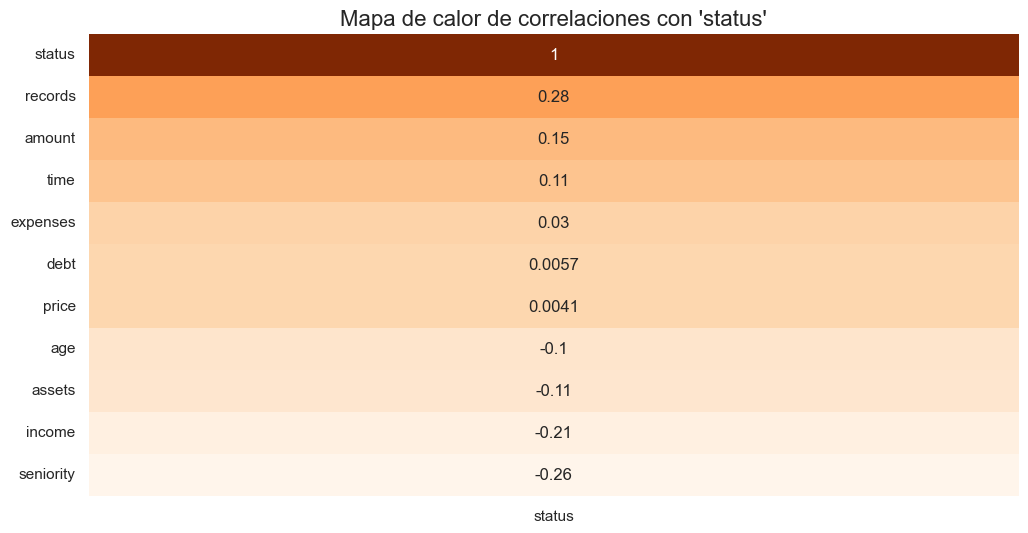

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
correlation_with_status = correlation_matrix['status']

sorted_correlation = correlation_with_status.sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.heatmap(df[sorted_correlation.index].corr().loc['status'].to_frame(), annot=True, cmap="Oranges", cbar=False)
plt.title("Mapa de calor de correlaciones con 'status'", fontsize=16)
plt.show()

**En el gráfico podemos ver cuales son las variables que más podrían afectar al modelo, que son las siguientes: "records", "seniority", "income" y "amount"**

<br>
<br>

**Ahora crearemos una función la cual nos permitirá crear nuevas variables, así como eliminar las variables que no nos aportan valor**

In [88]:
# Creamos la función
def crear_variables(df):
    # Creación de variables
    df['benefit'] = df['income'] - df['expenses'] # beneficios mensuales
    df['assets_to_amount'] = df['assets'] - df['amount'] # activos - credito
    df['loan_to_value'] = df['amount'] - df['price'] # monto prestamo - precio del bien o servicio
    df['monthly_payment'] = df['amount'] / df['time'] # deuda crediticia a pagar mensualmente
    df['monthly_savings'] = df['income'] - df['expenses'] - df['monthly_payment'] # ahorro mensual
    df['age_end_payment'] = df['age'] + (df['time'] // 12) # edad + meses en pagar
    
    # Eliminacion de variables
    df.drop(['debt', 'price'], axis=1, inplace=True)
    
    return df

In [89]:
# Ejecutamos la función
df = crear_variables(df)

<br>
<br>

## Preparación del Dataset

In [111]:
# Dividimos el dataframe entre entrenamiento y validacion
x = df.drop(columns=['status'])
y = df.status

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=99)

**Ahora comprobaremos si los resultados de los modelos son mejores trás el preprocesamiento**

<br>
<br>

## Modelos

#### RandomForest

In [112]:
# Buscamos los hiperparamentros para el modelo RandomForest
from flaml import AutoML

automl_forest = AutoML()
settings = {
    'task': 'classification',
    'estimator_list': ['rf'],
    'time_budget': 600,
    'metric': 'roc_auc',
    'verbose': 1
}

automl_forest.fit(x_train, y_train, **settings)

In [113]:
# Predecimos con el modelo con hiperparametros
y_pred_train_rf = automl_forest.predict(x_train)
probs_train_rf = automl_forest.predict_proba(x_train)[:, 1]

y_pred_test_rf = automl_forest.predict(x_test)
probs_test_rf = automl_forest.predict_proba(x_test)[:, 1]

In [114]:
# Verificamos la eficiencia de nuestro modelo
train_auc = roc_auc_score(y_train, probs_train_rf)
train_accuracy = accuracy_score(y_train, y_pred_train_rf)

test_auc = roc_auc_score(y_test, probs_test_rf)
test_accuracy = accuracy_score(y_test, y_pred_test_rf)

# Ejecutamos la función que nos indica la relacion de resultados entre train y test
under, over = evaluar_fit(train_auc, test_auc)

# Agregamos los resultados al df de resultados
df_resultados.loc["RandomForest (FE)"] = [test_auc, test_accuracy, under, over]
df_resultados.sort_values(by='Test AUC', ascending=False)

,Test AUC,Test Accuracy,Underfitting,Overfitting
CatBoost,0.851683,0.804795,0.0,0.029549
RandomForest,0.849367,0.804795,0.0,0.096049
RandomForest (FE),0.847920,0.800228,0.0,0.077829
LightGBM,0.847624,0.807078,0.0,0.037350
XGBoost,0.846096,0.813927,0.0,0.044899
KNN,0.704772,0.750000,0.0,0.295228


<br>
<br>

#### XGBoost

In [115]:
automl_xgb = AutoML()
settings = {
    'task': 'classification',
    'estimator_list': ['xgboost'],
    'time_budget': 600,
    'metric': 'roc_auc',
    'verbose': 1
}

automl_xgb.fit(x_train, y_train, **settings)

In [116]:
# Predecimos con el modelo con hiperparametros
y_pred_train_xgb = automl_xgb.predict(x_train)
probs_train_xgb = automl_xgb.predict_proba(x_train)[:, 1]

y_pred_test_xgb = automl_xgb.predict(x_test)
probs_test_xgb = automl_xgb.predict_proba(x_test)[:, 1]

In [117]:
# Comprobamos los resultados del modelo con hiperparametros
train_auc = roc_auc_score(y_train, probs_train_xgb)
train_accuracy = accuracy_score(y_train, y_pred_train_xgb)

test_auc = roc_auc_score(y_test, probs_test_xgb)
test_accuracy = accuracy_score(y_test, y_pred_test_xgb)

# Ejecutamos la función que nos indica la relacion de resultados entre train y test
under, over = evaluar_fit(train_auc, test_auc)

# Agregamos los resultados al df de resultados
df_resultados.loc["XGBoost (FE)"] = [test_auc, test_accuracy, under, over]
df_resultados.sort_values(by='Test AUC', ascending=False)

,Test AUC,Test Accuracy,Underfitting,Overfitting
XGBoost (FE),0.854260,0.813927,0.0,0.025784
CatBoost,0.851683,0.804795,0.0,0.029549
RandomForest,0.849367,0.804795,0.0,0.096049
RandomForest (FE),0.847920,0.800228,0.0,0.077829
LightGBM,0.847624,0.807078,0.0,0.037350
XGBoost,0.846096,0.813927,0.0,0.044899
KNN,0.704772,0.750000,0.0,0.295228


<br>
<br>

#### CatBoost

In [118]:
# Buscamos los mejores hiperparametros para CatBoost
automl_cat = AutoML()
settings = {
    'task': 'classification',
    'estimator_list': ['catboost'],
    'time_budget': 600,
    'metric': 'roc_auc',
    'verbose': 1
}

automl_cat.fit(x_train, y_train, **settings)

In [119]:
# Predecimos con el modelo con hiperparametros
y_pred_train_cat = automl_cat.predict(x_train)
probs_train_cat = automl_cat.predict_proba(x_train)[:, 1]

y_pred_test_cat = automl_cat.predict(x_test)
probs_test_cat = automl_cat.predict_proba(x_test)[:, 1]

In [120]:
# Comprobamos los resultados del modelo con hiperparametros
train_auc = roc_auc_score(y_train, probs_train_cat)
train_accuracy = accuracy_score(y_train, y_pred_train_cat)

test_auc = roc_auc_score(y_test, probs_test_cat)
test_accuracy = accuracy_score(y_test, y_pred_test_cat)

# Ejecutamos la función que nos indica la relacion de resultados entre train y test
under, over = evaluar_fit(train_auc, test_auc)

# Agregamos los resultados al df de resultados
df_resultados.loc["CatBoost (FE)"] = [test_auc, test_accuracy, under, over]
df_resultados.sort_values(by='Test AUC', ascending=False)

,Test AUC,Test Accuracy,Underfitting,Overfitting
CatBoost (FE),0.855061,0.812785,0.0,0.028996
XGBoost (FE),0.854260,0.813927,0.0,0.025784
CatBoost,0.851683,0.804795,0.0,0.029549
RandomForest,0.849367,0.804795,0.0,0.096049
RandomForest (FE),0.847920,0.800228,0.0,0.077829
LightGBM,0.847624,0.807078,0.0,0.037350
XGBoost,0.846096,0.813927,0.0,0.044899
KNN,0.704772,0.750000,0.0,0.295228


<br>
<br>

#### LightGBM

In [121]:
# Buscamos los mejores hiperparametros para LightGBM
automl_lgbm = AutoML()
settings = {
    'task': 'classification',
    'estimator_list': ['lgbm'],
    'time_budget': 600,
    'metric': 'roc_auc',
    'verbose': 1
}

automl_lgbm.fit(x_train, y_train, **settings)

In [122]:
# Predecimos con el modelo con hiperparametros
y_pred_train_lgbm = automl_lgbm.predict(x_train)
probs_train_lgbm = automl_lgbm.predict_proba(x_train)[:, 1]

y_pred_test_lgbm = automl_lgbm.predict(x_test)
probs_test_lgbm = automl_lgbm.predict_proba(x_test)[:, 1]

In [123]:
# Comprobamos los resultados del modelo con hiperparametros
train_auc = roc_auc_score(y_train, probs_train_lgbm)
train_accuracy = accuracy_score(y_train, y_pred_train_lgbm)

test_auc = roc_auc_score(y_test, probs_test_lgbm)
test_accuracy = accuracy_score(y_test, y_pred_test_lgbm)

# Ejecutamos la función que nos indica la relacion de resultados entre train y test
under, over = evaluar_fit(train_auc, test_auc)

# Agregamos los resultados al df de resultados
df_resultados.loc["LightGBM (FE)"] = [test_auc, test_accuracy, under, over]
df_resultados.sort_values(by='Test AUC', ascending=False)

,Test AUC,Test Accuracy,Underfitting,Overfitting
LightGBM (FE),0.857622,0.812785,0.0,0.035380
CatBoost (FE),0.855061,0.812785,0.0,0.028996
XGBoost (FE),0.854260,0.813927,0.0,0.025784
CatBoost,0.851683,0.804795,0.0,0.029549
RandomForest,0.849367,0.804795,0.0,0.096049
RandomForest (FE),0.847920,0.800228,0.0,0.077829
LightGBM,0.847624,0.807078,0.0,0.037350
XGBoost,0.846096,0.813927,0.0,0.044899
KNN,0.704772,0.750000,0.0,0.295228


**Podemos ver que gracias al prreprocesamiento hemos conseguido mejorar los resultados en test e incluso reducir el overfitting**

<br>
<br>

**Ahora probaremos a vectorizar, para ver si conseguimos reducir el overfitting**

### Vectorizar

In [124]:
# Tenemos que convertir los dataframes a diccionarios ya que DictVectorizer no funciona con dataframes
x_train_vec = x_train.to_dict(orient='records') # records es una palabra reservada, no hace referencia a la columna
x_test_vec = x_test.to_dict(orient='records')

# Vectorizamos
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

x_train_vec = dv.fit_transform(x_train_vec)
x_test_vec = dv.transform(x_test_vec)

<br>
<br>

**Volvemos a entrenar los modelos con los datos vectorizados, en este caso solo lo haremos con los 2 mejores modelos**

#### LightGBM

In [125]:
# Buscamos los hiperparamentros para el modelo xgboost
automl_lgbm = AutoML()
settings = {
    'task': 'classification',
    'estimator_list': ['lgbm'],
    'time_budget': 600,
    'metric': 'roc_auc',
    'verbose': 1
}

automl_lgbm.fit(x_train_vec, y_train, **settings)

In [126]:
# Predecimos con el modelo con hiperparametros
y_pred_train_lgbm = automl_lgbm.predict(x_train_vec)
probs_train_lgbm = automl_lgbm.predict_proba(x_train_vec)[:, 1]

y_pred_test_lgbm = automl_lgbm.predict(x_test_vec)
probs_test_lgbm = automl_lgbm.predict_proba(x_test_vec)[:, 1]

In [127]:
# Comprobamos los resultados del modelo con hiperparametros
train_auc = roc_auc_score(y_train, probs_train_lgbm)
train_accuracy = accuracy_score(y_train, y_pred_train_lgbm)

test_auc = roc_auc_score(y_test, probs_test_lgbm)
test_accuracy = accuracy_score(y_test, y_pred_test_lgbm)

# Ejecutamos la función que nos indica la relacion de resultados entre train y test
under, over = evaluar_fit(train_auc, test_auc)

# Agregamos los resultados al df de resultados
df_resultados.loc["LightGBM (FE + vec)"] = [test_auc, test_accuracy, under, over]
df_resultados.sort_values(by='Test AUC', ascending=False)

,Test AUC,Test Accuracy,Underfitting,Overfitting
LightGBM (FE),0.857622,0.812785,0.0,0.035380
LightGBM (FE + vec),0.855418,0.817352,0.0,0.027317
CatBoost (FE),0.855061,0.812785,0.0,0.028996
XGBoost (FE),0.854260,0.813927,0.0,0.025784
CatBoost,0.851683,0.804795,0.0,0.029549
RandomForest,0.849367,0.804795,0.0,0.096049
RandomForest (FE),0.847920,0.800228,0.0,0.077829
LightGBM,0.847624,0.807078,0.0,0.037350
XGBoost,0.846096,0.813927,0.0,0.044899
KNN,0.704772,0.750000,0.0,0.295228


<br>
<br>

#### CatBoost

In [128]:
# Buscamos los mejores hiperparametros para CatBoost
automl_cat = AutoML()
settings = {
    'task': 'classification',
    'estimator_list': ['catboost'],
    'time_budget': 600,
    'metric': 'roc_auc',
    'verbose': 1
}

automl_cat.fit(x_train_vec, y_train, **settings)

In [137]:
# Predecimos con el modelo con hiperparametros
y_pred_train_cat = automl_cat.predict(x_train_vec)
probs_train_cat = automl_cat.predict_proba(x_train_vec)[:, 1]

y_pred_test_cat = automl_cat.predict(x_test_vec)
probs_test_cat = automl_cat.predict_proba(x_test_vec)[:, 1]

In [138]:
# Comprobamos los resultados del modelo con hiperparametros
train_auc = roc_auc_score(y_train, probs_train_cat)
train_accuracy = accuracy_score(y_train, y_pred_train_cat)

test_auc = roc_auc_score(y_test, probs_test_cat)
test_accuracy = accuracy_score(y_test, y_pred_test_cat)

# Ejecutamos la función que nos indica la relacion de resultados entre train y test
under, over = evaluar_fit(train_auc, test_auc)

# Agregamos los resultados al df de resultados
df_resultados.loc["CatBoost (FE + vec)"] = [test_auc, test_accuracy, under, over]
df_resultados.sort_values(by='Test AUC', ascending=False)

,Test AUC,Test Accuracy,Underfitting,Overfitting
LightGBM (FE),0.857622,0.812785,0.0,0.035380
LightGBM (FE + vec),0.855418,0.817352,0.0,0.027317
CatBoost (FE),0.855061,0.812785,0.0,0.028996
XGBoost (FE),0.854260,0.813927,0.0,0.025784
CatBoost (FE + vec),0.853022,0.811644,0.0,0.030500
CatBoost,0.851683,0.804795,0.0,0.029549
RandomForest,0.849367,0.804795,0.0,0.096049
RandomForest (FE),0.847920,0.800228,0.0,0.077829
LightGBM,0.847624,0.807078,0.0,0.037350
XGBoost,0.846096,0.813927,0.0,0.044899


<br>
<br>

#### XGBoost

In [131]:
# Buscamos los mejores hiperparametros para XGBoost
automl_xgb = AutoML()
settings = {
    'task': 'classification',
    'estimator_list': ['xgboost'],
    'time_budget': 600,
    'metric': 'roc_auc',
    'verbose': 1
}

automl_xgb.fit(x_train_vec, y_train, **settings)

In [139]:
# Predecimos con el modelo con hiperparametros
y_pred_train_xgb = automl_xgb.predict(x_train_vec)
probs_train_xgb = automl_xgb.predict_proba(x_train_vec)[:, 1]

y_pred_test_xgb = automl_xgb.predict(x_test_vec)
probs_test_xgb = automl_xgb.predict_proba(x_test_vec)[:, 1]

In [140]:
# Comprobamos los resultados del modelo con hiperparametros
train_auc = roc_auc_score(y_train, probs_train_xgb)
train_accuracy = accuracy_score(y_train, y_pred_train_xgb)

test_auc = roc_auc_score(y_test, probs_test_xgb)
test_accuracy = accuracy_score(y_test, y_pred_test_xgb)

# Ejecutamos la función que nos indica la relacion de resultados entre train y test
under, over = evaluar_fit(train_auc, test_auc)

# Agregamos los resultados al df de resultados
df_resultados.loc["XGBoost (FE + vec)"] = [test_auc, test_accuracy, under, over]
df_resultados.sort_values(by='Test AUC', ascending=False)

,Test AUC,Test Accuracy,Underfitting,Overfitting
LightGBM (FE),0.857622,0.812785,0.0,0.035380
LightGBM (FE + vec),0.855418,0.817352,0.0,0.027317
CatBoost (FE),0.855061,0.812785,0.0,0.028996
XGBoost (FE),0.854260,0.813927,0.0,0.025784
XGBoost (FE + vec),0.854072,0.816210,0.0,0.042097
CatBoost (FE + vec),0.853022,0.811644,0.0,0.030500
CatBoost,0.851683,0.804795,0.0,0.029549
RandomForest,0.849367,0.804795,0.0,0.096049
RandomForest (FE),0.847920,0.800228,0.0,0.077829
LightGBM,0.847624,0.807078,0.0,0.037350


<br>
<br>

<h1 style="text-align:left;">Conclusión</h1>

Podemos ver que mejoramos el ovefitting, con el modelo LightGBM, sin apenas perjudicar el resultado del test, por lo que decidimos quedarnos con el resultado de "LightGBM (FE + vec)", aunque sea un poco inferior pero tiene bastante menos overfitting